<a href="https://colab.research.google.com/github/AllenHichard/Analise_Algoritmos/blob/main/Atividade3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Algoritmos

In [43]:
def ks_T(W,P,c):
    T = [[0 for x in range(c+1)] for y in range(len(W))]
    for i in range(0, len(W)): #
        for j in range(0, c+1):
            if W[i] <= j:
                T[i][j] = max(T[i-1][j], P[i] + T[i - 1][j - W[i]] )
            else:
                T[i][j] = T[i-1][j]
    return T[-1][-1]

def ks_M(W,P,c,i,M):
    if i == 0 or c <= 0:
        return 0
    if (c, i) in M:
        return M[(c, i)]
    if W[i-1] > c:
        M[(c, i)] = ks_M(W, P, c, i-1,M)
        return M[(c, i)]
    else:
        M[(c, i)] = max(P[i-1] + ks_M(W, P, c-W[i-1], i-1,M),ks_M(W, P, c, i-1,M))
        return M[(c, i)]


def ks(W,P,c,i):
    if i == 0 or c <= 0:
        return 0
    if W[i-1] > c:
        return ks(W, P, c, i-1)
    else:
        return max(P[i-1] + ks(W, P, c-W[i-1], i-1),ks(W, P, c, i-1))

#to do
def knapSackNaive(W,P,c):
    return ks(W,P,c,len(W))
#to do
def knapSackMem(W,P,c):
    return ks_M(W,P,c,len(W),{})
#to do
def knapSacTab(W,P,c):
    return ks_T(W,P,c)
  

Data Colection

In [ ]:
import time
from numpy import random

WEIGHT_DOMAIN = 100
PROFIT_DOMAIN = 1000
CAPACITY_PROBABILITY = 0.3

#defines the number of times each algorithm will be processed to obtain the average time
num_rounds = 5

alg_results = dict()

#calculates the executions average time
def avgTime(func, size, debug=True):
  t = 0
  for i in range(num_rounds):  
    random.seed(size+i)    
    W = list(random.randint(WEIGHT_DOMAIN, size=size))
    P = list(random.randint(PROFIT_DOMAIN, size=size))    
    c = random.randint(int(CAPACITY_PROBABILITY*size)*WEIGHT_DOMAIN)
    start = time.time()
    p = func(W,P,c)
    end = time.time()    
    t += end - start

    if debug:
      ##create a variable to store the debug results
      if 'DR' not in globals():
        global DR
        DR = dict()
      
      ##add the result or check if it is the same
      if (size,i) not in DR:
        DR[(size,i)] = p
      else:
        assert p == DR[(size,i)]
      
  return t/num_rounds


#defines the algorithms to be processed
algorithms = [knapSackNaive,knapSackMem,knapSacTab]

sizes = [5,10,15,20,25]
sizes = [100,200,300,400,500]

mapSizeToTime = dict()
for i in range(len(sizes)):
  print(f"Starting collect {i+1}")
  
  #map list size to algorithm average time
  for algorithm in algorithms:
    print('  > ', algorithm.__name__)  
    mapSizeToTime[f"{algorithm.__name__ }##{sizes[i]}"] = avgTime(algorithm, sizes[i], True)
  print("")

print(f"Finish data collection")

Starting collect 1
  >  knapSackNaive


Gráfico

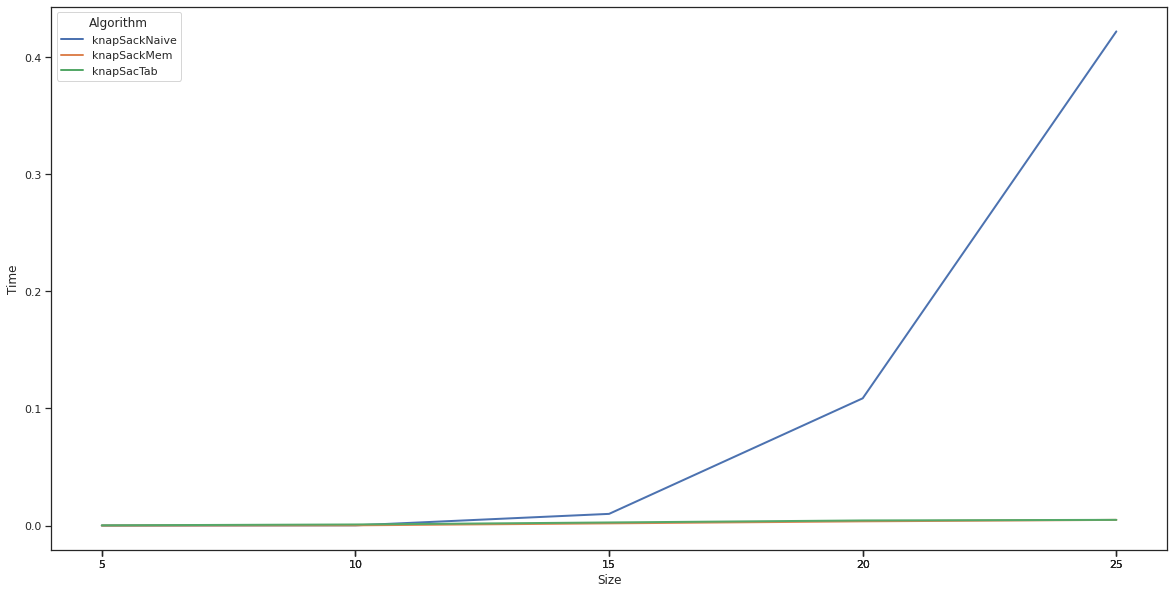

<Figure size 1440x720 with 0 Axes>

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame.from_dict(mapSizeToTime, orient='index', columns=['Time'])
df['Algorithm'] = [i.split("##")[0] for i in df.index]
df['Size'] = [int(i.split("##")[1]) for i in df.index]
df

#Defines font size and line width
sns.set(font_scale=1, style="ticks", rc={"lines.linewidth": 2})

#Defines plot size
plt.rcParams['figure.figsize'] = [20, 10]

chart = sns.lineplot(x='Size', y='Time', hue='Algorithm', data=df)

#plt.yscale('log')
fig = plt.figure()
chart.set(xticks=[i for i in df.Size])
plt.show()